In [85]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize #pentru ex1
from scipy.optimize import minimize #pentru ex2
import seaborn as sns #pentru ex3 
from scipy.stats import gaussian_kde #pentru ex7
from sklearn.linear_model import LinearRegression #pentru ex8
from sklearn.metrics import mean_squared_error #pentru ex8
#from scipy.special import binom
import pandas as pd
#import math
#import pickle
#import statsmodels.stats.power
import statsmodels.api as sm
#import statsmodels.stats.multitest as mt
#from sklearn import datasets

# Galton dataset

In [86]:
father_son = pd.read_csv('father_son.csv')
father_son.head()

,Unnamed: 0,fheight,sheight
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113


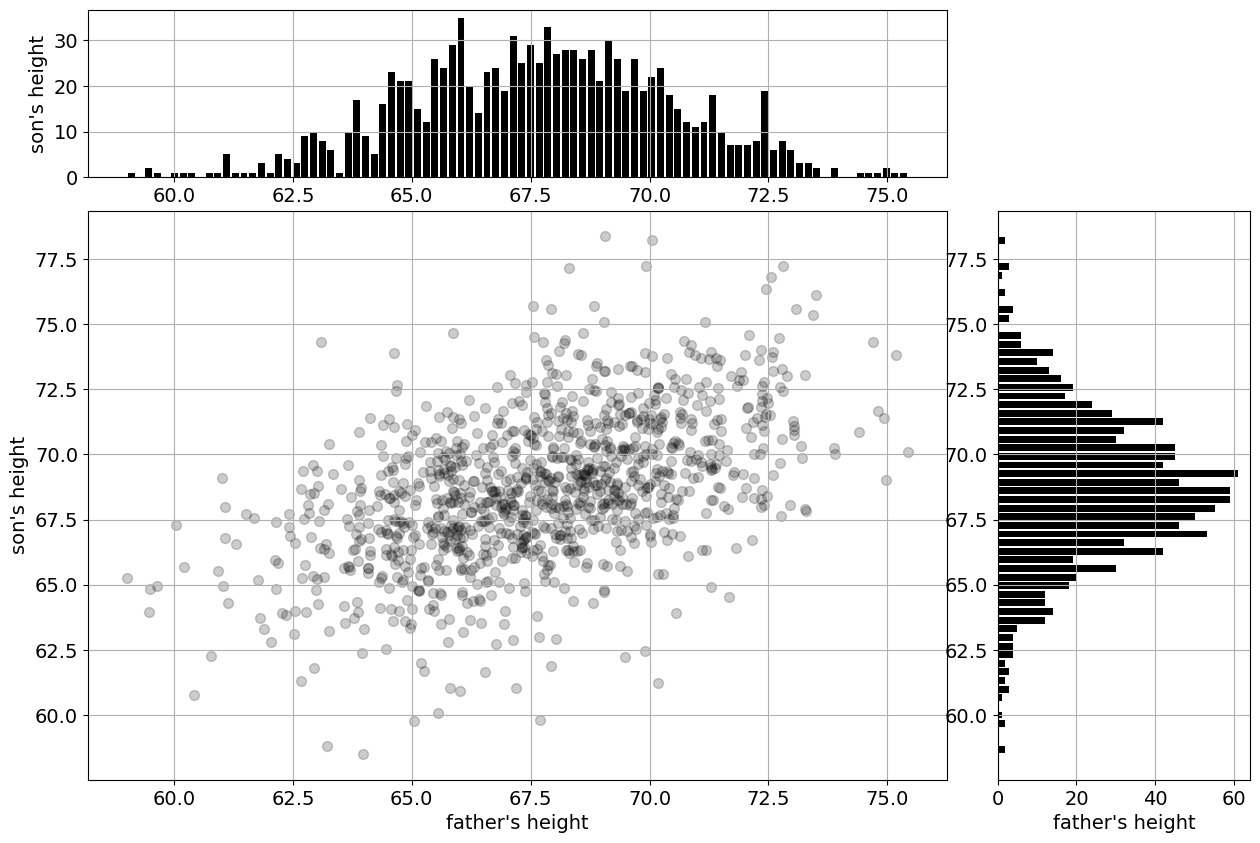

In [87]:
# see https://stackoverflow.com/questions/37008112/matplotlib-plotting-histogram-plot-just-above-scatter-plot

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

plt.rcParams.update({'font.size': 14})

fheight = father_son['fheight'].values
sheight = father_son['sheight'].values

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3],sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3],sharey=ax_main)

ax_main.scatter(fheight, sheight, c='k', alpha = .2, s=50)
ax_main.set(xlabel="father's height", ylabel="son's height")
ax_main.grid(True)

ax_fDist.hist(fheight, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.set(ylabel="son's height")
ax_fDist.grid(True)

ax_sDist.hist(sheight, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.set(xlabel="father's height")
ax_sDist.grid(True)

plt.show()

In [88]:
x = np.random.randn(10) + 6
y = x/3 + np.random.randn(10)/1.5 - 2
x1 = np.array(range(11))

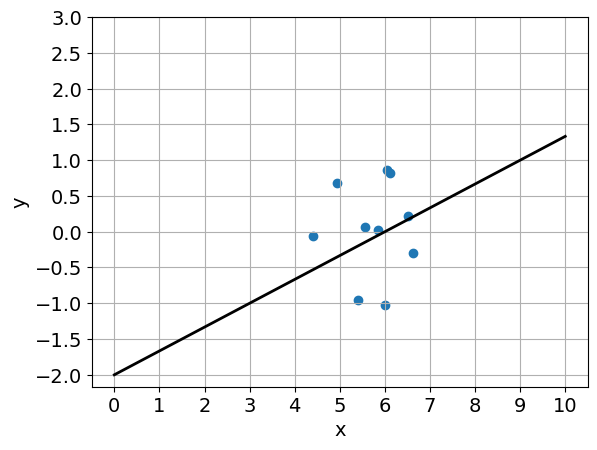

In [89]:
plt.scatter(x, y)
plt.plot(x1, x1/3 - 2, '-', c='k', lw=2)
plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

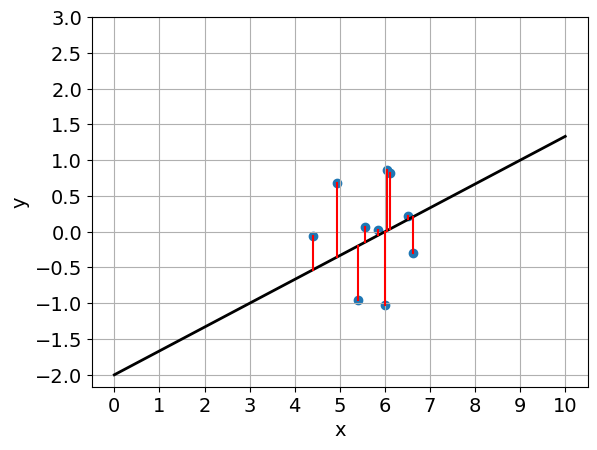

In [90]:
def f(x):
    return x/3 - 2

yf = f(x)
plt.scatter(x, y)
plt.plot(x1, f(x1), '-', c='k', lw=2)
[plt.plot([x[i], x[i]], [y[i], yf[i]], c='r') for i in range(len(x))]

plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

beta0: 33.88660435407793 beta1: 0.5140930386233074
intercept: 33.88660435407814 coefficient: 0.5140930386233072


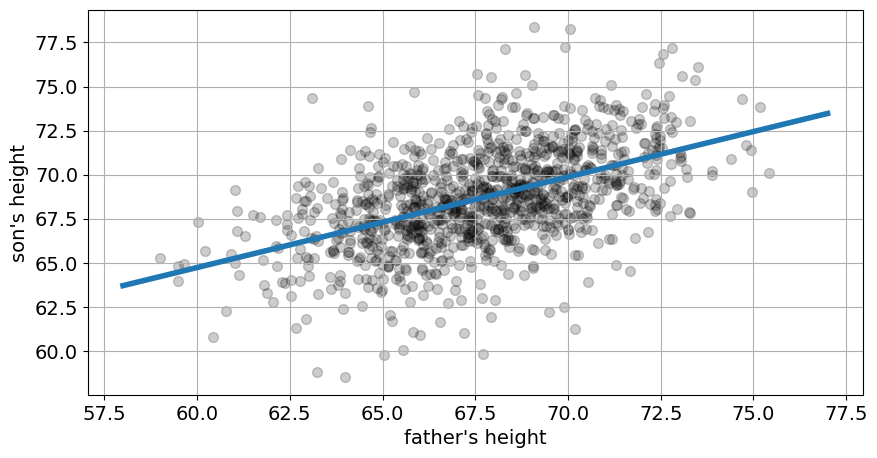

In [91]:
# see https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/

x, y = np.array(fheight), np.array(sheight)
beta1 = np.corrcoef(x, y)[0, 1] * np.std(y)/np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)
print('beta0:', beta0, 'beta1:', beta1)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
print('intercept:', lm.params[0], 'coefficient:', lm.params[1])

x1 = np.linspace(58, 77, 100)
y1 = beta1 * x1 + beta0

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=4)
ax.set(xlabel="father's height", ylabel="son's height")
ax.grid(True)
plt.show()

# Regresia catre medie

In [92]:
x = np.random.randn(10)
ordered = np.argsort(x)[::-1]

y = np.random.randn(10)

# doar in 1 caz din 11 vom obtine un numar mai mic
print(x[ordered[0]], '>', y[ordered[0]])

2.060747924881987 > -1.183258512665775


In [93]:
# verificare
n = 10000000
x = np.random.randn(n, 10)
ordered = np.argsort(x, axis=1)
for i in range(x.shape[0]):
    x[i, :] = x[i, ordered[i][::-1]]

y = np.random.randn(n, 10)
print(np.sum(x[:, 0] < y[:, 0]) / n, 'vs. 1/11 =', 1/11)

0.0909838 vs. 1/11 = 0.09090909090909091


rho: 0.5013383111723432


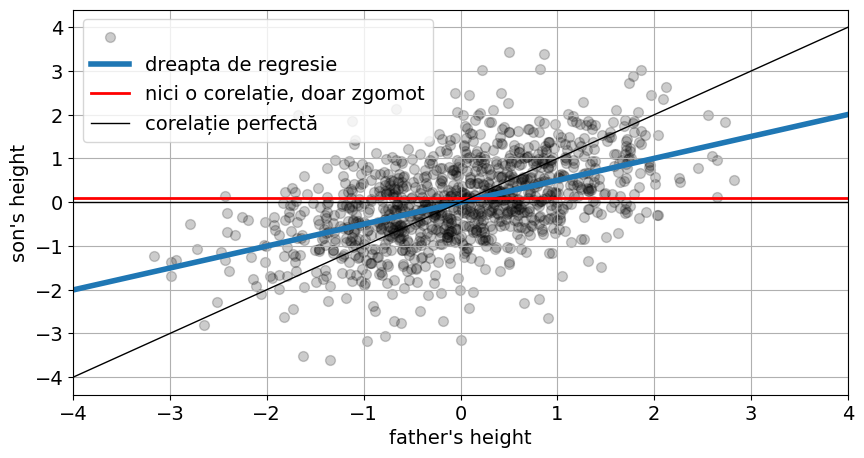

In [94]:
# originea este acum (Xbar, Ybar)
x, y = np.array(fheight), np.array(sheight)
x, y = (x - np.mean(x))/np.std(x), (y - np.mean(y))/np.std(y)
rho = np.corrcoef(x, y)[0, 1]
print('rho:', rho)

x1 = np.linspace(-4, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, rho * x1, lw=4)
ax.plot([4, -4], [0.1, 0.1], 'r', lw=2)
ax.plot(x1, x1, lw=1, c='k')
ax.plot(x1, [0] * len(x1), lw=1, c='k')
ax.legend(['', 'dreapta de regresie', 'nici o corelație, doar zgomot', 
           'corelație perfectă'])
ax.set(xlabel="father's height", ylabel="son's height", xlim=(-4, 4))
ax.grid(True)
plt.show()

# Laborator

__Q1__. Considerăm setul $X = \{0.725, 0.429, -0.372, 0.863\}$. Ce valoare a lui $\mu$ minimizează $\sum_i (X_i - \mu)^2$ ? Verificați cu câteva valori în jur.

In [95]:
X = np.array([0.725, 0.429, -0.372, 0.863])

mu = np.mean(X)

def objective_function(mu): # functia obiectiv pe care o minimizam (suma patratelor diferentelor)
    return np.sum((X - mu)**2) 

result = optimize.minimize_scalar(objective_function) # minimizam functia obiectiv 

print("Valoarea lui mu care minimizeaza functia obiectiv este:", result.x)

print("Verificare cu valori în jur:")
for mu in np.linspace(result.x - 0.1, result.x + 0.1, num=21): # verificare cu valori in jur
    # alegerea unui interval mic reduce numărul de calcule necesare, făcând verificarea rapidă și eficientă din punct de vedere al resurselor de calcul
    print("mu =", round(mu, 4), " -> funcția obiectiv =", round(objective_function(mu), 6)) # valoarea functiei obiectiv


Valoarea lui mu care minimizeaza functia obiectiv este: 0.4112500000000001
Verificare cu valori în jur:
mu = 0.3113  -> funcția obiectiv = 0.956313
mu = 0.3213  -> funcția obiectiv = 0.948713
mu = 0.3313  -> funcția obiectiv = 0.941913
mu = 0.3413  -> funcția obiectiv = 0.935913
mu = 0.3513  -> funcția obiectiv = 0.930713
mu = 0.3613  -> funcția obiectiv = 0.926313
mu = 0.3713  -> funcția obiectiv = 0.922713
mu = 0.3813  -> funcția obiectiv = 0.919913
mu = 0.3913  -> funcția obiectiv = 0.917913
mu = 0.4013  -> funcția obiectiv = 0.916713
mu = 0.4113  -> funcția obiectiv = 0.916313
mu = 0.4213  -> funcția obiectiv = 0.916713
mu = 0.4313  -> funcția obiectiv = 0.917913
mu = 0.4413  -> funcția obiectiv = 0.919913
mu = 0.4513  -> funcția obiectiv = 0.922713
mu = 0.4613  -> funcția obiectiv = 0.926313
mu = 0.4713  -> funcția obiectiv = 0.930713
mu = 0.4813  -> funcția obiectiv = 0.935913
mu = 0.4913  -> funcția obiectiv = 0.941913
mu = 0.5013  -> funcția obiectiv = 0.948713
mu = 0.5113  -> 

__Q2__. Pentru problema anterioară, considerăm că se dă un set de ponderi $w = \{2, 2, 1, 1\}$. Dorim să minimizăm suma $\sum_i w_i(x-\mu)^2$. Ce valoare pentru $\mu$ obținem?

In [96]:
x = np.array([0.725, 0.429, -0.372, 0.863]) 
w = np.array([2, 2, 1, 1])

def objective_function(mu): # functia obiectiv pe care o minimizam (suma patratelor diferentelor)
    return np.sum(w * (x - mu)**2) # ponderile sunt aplicate la fiecare termen 

result = minimize(objective_function, x.mean()) 
print("Valoarea lui 𝜇 care minimizează funcția obiectiv este:", round(result.x[0], 4)) 

Valoarea lui 𝜇 care minimizează funcția obiectiv este: 0.4665


__Q3__. Pentru setul Galton (fathers.sons):
    
a) găsiți media, deviația standard și corelația dintre înălțimile părinților și cele ale fiilor.
b) centrați variabilele pentru fii și părinți și verificați că variabilele centrate au media 0.
c) realizați același lucru pentru deviația standard și verificați că ea devine 1.
d) realizați procedura completă de normalizare (centrare + scalare) și verificați $N(0, 1)$.

Rezolvare a)
------------
fheight_mean: 67.69
fheight_std: 2.74
sheight_mean: 68.68
sheight_std: 2.81
corelatia 0.50


Rezolvare b)
------------
media variabilei centrate pentru inaltimea parintilor: -0.0000000000
media variabilei centrate pentru inaltimea fiilor: 0.0000000000


Rezolvare c)
------------
deviatia standard father: 1.0000000000
deviatia standard son 1.0000000000


Rezolvare d)
------------


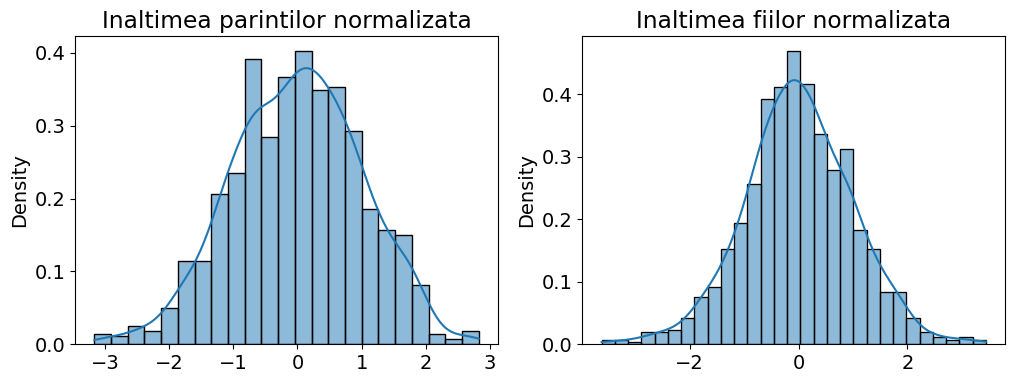

Media variabilei normalizate father: -0.0000000000
Deviatia standard a variabilei normalizate father: 1.0000000000
Media variabilei normalizate son: 0.0000000000
Deviatia standard a variabilei normalizate son: 1.0000000000


In [97]:
print ("Rezolvare a)\n------------");

father_son = pd.read_csv('father_son.csv') 

fheight = father_son['fheight'].values # inaltimea parintilor
sheight = father_son['sheight'].values # inaltimea fiilor

#media si deviatia standard father
fheight_mean = np.mean(fheight) # media inaltimii parintilor
fheight_std = np.std(fheight) # deviatia standard a inaltimii parintilor

# mediei si deviatia standard son
sheight_mean = np.mean(sheight) # media inaltimii fiilor
sheight_std = np.std(sheight) # deviatia standard a inaltimii fiilor

#corelatia
corr = np.corrcoef(fheight, sheight)[0, 1] # corelatia dintre inaltimea parintilor si a fiilor
#elementele pe diagonala principală sunt 1 (deoarece orice variabilă este perfect corelată cu ea însăși),
# iar valorile de pe pozițiile [0, 1] și [1, 0] sunt coeficientul de corelație între fheight și sheight.

print("fheight_mean: {:.2f}".format(fheight_mean))
print("fheight_std: {:.2f}".format(fheight_std))
print("sheight_mean: {:.2f}".format(sheight_mean))
print("sheight_std: {:.2f}".format(sheight_std))
print("corelatia {:.2f}".format(corr))
print ("\n\nRezolvare b)\n------------");

# centram variabilele, adica scadem media variabilei de la fiecare valoare a variabilei si obtinem media 0
fheight_centered = fheight - np.mean(fheight) # inaltimea parintilor centrate
sheight_centered = sheight - np.mean(sheight) # inaltimea fiilor centrate


# verificare
print("media variabilei centrate pentru inaltimea parintilor: {:.10f}".format(np.mean(fheight_centered)))
print("media variabilei centrate pentru inaltimea fiilor: {:.10f}".format(np.mean(sheight_centered)))


print ("\n\nRezolvare c)\n------------");

# centrare variabilele 
fheight_centered = fheight - np.mean(fheight)
sheight_centered = sheight - np.mean(sheight)

# standardizare variabilele 
fheight_standardized = fheight_centered / np.std(fheight) # inaltimea parintilor standardizata
sheight_standardized = sheight_centered / np.std(sheight) # inaltimea fiilor standardizata

# verificare
print("deviatia standard father: {:.10f}".format(np.std(fheight_standardized)))
print("deviatia standard son {:.10f}".format(np.std(sheight_standardized)))


print ("\n\nRezolvare d)\n------------");
#normalizarea inseamna sa standardizam variabilele si apoi sa le centram
# standardizare variabilele centrate
fheight_normalized = (fheight_centered / np.std(fheight)) # inaltimea parintilor normalizata
sheight_normalized = (sheight_centered / np.std(sheight)) # inaltimea fiilor normalizata

# verificare distributia variabilelor standardizate
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
#În loc să arate frecvențele prin bare, cum face o histogramă clasică, 
#KDE trasează o linie care arată zonele cu cea mai mare concentrație de date și cum aceasta variază
sns.histplot(fheight_normalized, ax=axs[0], kde=True, stat='density') #axs[0] - primul subplot
sns.histplot(sheight_normalized, ax=axs[1], kde=True, stat='density') #axs[1] - al doilea subplot
axs[0].set_title('Inaltimea parintilor normalizata')
axs[1].set_title('Inaltimea fiilor normalizata')
plt.show()

# verificare medie si deviatie standard 
print("Media variabilei normalizate father: {:.10f}".format(np.mean(fheight_normalized)))
print("Deviatia standard a variabilei normalizate father: {:.10f}".format(np.std(fheight_normalized)))
print("Media variabilei normalizate son: {:.10f}".format(np.mean(sheight_normalized)))
print("Deviatia standard a variabilei normalizate son: {:.10f}".format(np.std(sheight_normalized)))


__Q4__. Considerăm un dataset pentru care deviația standard a variabilei prezise este dublu față de deviația standard a predictorului său. Variabilele au o corelație de 0.3. Dacă potrivim un model de regresie liniară, care va fi panta estimată?

In [98]:
sy = 2 #deviatia standard a variabilei y
sx = 1 #deviatia standard a variabilei x; am ales-o arbitrar
corelatie = 0.3 #corelatia dintre x si y

panta = corelatie * (sy / sx) #formula pentru panta : corelatia * (deviatia standard a y / deviatia standard a x)
print("Panta estimată:", panta)

Panta estimată: 0.6


Q5. Pentru problema anterioară, variabila prezisă are o medie 1 iar predictorul o medie de 0.5. Care este intercept-ul?

In [99]:
sy = 2 #deviatia standard a variabilei y
sx = 1 #deviatia standard a variabilei x 
corelatie = 0.3
y_mean = 1 # media variabilei prezise y
x_mean = 0.5 # valoarea medie a variabilei predictor x

panta = corelatie * (sy / sx)
intercept = y_mean - panta * x_mean # formula pentru interceptul dreptei de regresie : media variabilei y - panta * media variabilei x

print("Interceptul este:", intercept)

Interceptul este: 0.7


Q6. Avem două cântare care au asociat zgomot, și mai mulți oameni pe care vrem să-i cântărim. Vom cântări fiecare persoană pe ambele cântare. Corelația este de 0.75. Fiecare set de măsurători este normalizat. Masa cuiva este la 2 deviații standard peste medie în primul grup de cântăriri. La câte deviații standard față de medie estimăm că este masa corespondentă în al doilea grup?

In [100]:
#normalizare =  (media = 0, deviația standard = 1)
x_1 = 2 #masa normalizată a persoanei în primul set de cântăriri
s_1 = 1 #deviația standard a măsurătorilor din primul set de cântăriri
mu_1 = 0 #media măsurătorilor din primul set de cântăriri (setul de măsurători este normalizat)
s_2 = 1 #deviația standard a măsurătorilor din al doilea set de cântăriri
mu_2 = 0 #media măsurătorilor din al doilea set de cântăriri (setul de măsurători este normalizat)
corelatia = 0.75

#formula am dedus-o din formulele de mai sus
x_2 = corelatia * (s_2 / s_1) * x_1 + (mu_2 - corelatia * (s_2 / s_1) * mu_1) 

print("Masa corespondentă din al doilea set de cântăriri este:", x_2, "deviații standard peste medie.")
# se reflectă faptul că, în ciuda unei corelații puternice, există o mică incertitudine sau variație introdusă de zgomotul diferit asociat fiecărui cântar.

Masa corespondentă din al doilea set de cântăriri este: 1.5 deviații standard peste medie.


Q7. Considerăm următorul dataset, în care încercăm să prezicem Y pe baza lui X:

In [101]:
x = np.array([8.63, 11.23, 9.73, 11.89, 10.25, 14.12, 11.24, 13.59, 13.86, 13.09, 12.05, 13.46, 13.45, 12.71, 15.08, 14.93,
     14.6, 15.73, 15.39, 16.37, 17.65, 15.44, 17.62, 17.44, 16.63, 17.23, 19.07, 19.19, 19.71, 18.39, 18.68, 19.09,
     19.71, 20.52, 19.49, 21.85, 20.3, 22.38, 20.81, 20.44, 21.09, 21.85, 22.09, 22.75, 23.8, 21.03, 25.08, 23.51,
     25.67, 25.01])
y = np.array([15.61, 16.89, 17.24, 15.41, 17.03, 16.56, 17.26, 17.84, 20.56, 21.95, 20.54, 18.66, 20.98, 22.22, 22.39, 
     21.91, 22.17, 23.83, 24.19, 24.7, 25.92, 25.78, 23.4, 26.36, 25.68, 26.02, 27.42, 26.92, 27.81, 30.12, 29.2,
     30.63, 28.79, 30.07, 30.94, 32.35, 31.85, 30.93, 32.34, 33.28, 33.02, 32.9, 34.53, 34.57, 34.66, 34.48, 36.12,
     35.53, 37.56, 36.58])

a) determinați media și deviația standard pentru fiecare set X și Y;

b) reprezentați printr-un scatterplot Y funcție de X, și pe laturi densitățile de probabilitate pentru X și Y (aveți exemplu mai sus, al treilea frame, sub "Galton dataset");

c) determinați coeficientul de corelație dintre cele două seturi;

d) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea zero (sau cât mai apropiat de zero); reprezentați într-un scatter plot;

e) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea 1, fără ca seturile să fie identice; reprezentați într-un scatter plot;

f) determinați corelația pentru problema inițială, precum și intercept-ul. Calculați dreapta de regresie prin cele două metode (manual și cu metoda statmodels.OLS), și reprezentați-o.

a) determinați media și deviația standard pentru fiecare set X și Y;


In [102]:
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

print("X mean:", x_mean)
print("Y mean:", y_mean)
print("X standard deviation:", x_std)
print("Y standard deviation:", y_std)

X mean: 17.4984
Y mean: 26.473999999999997
X standard deviation: 4.321086141238103
Y standard deviation: 6.381005249958662


b) reprezentați printr-un scatterplot Y funcție de X, și pe laturi densitățile de probabilitate pentru X și Y (aveți exemplu mai sus, al treilea frame, sub "Galton dataset");

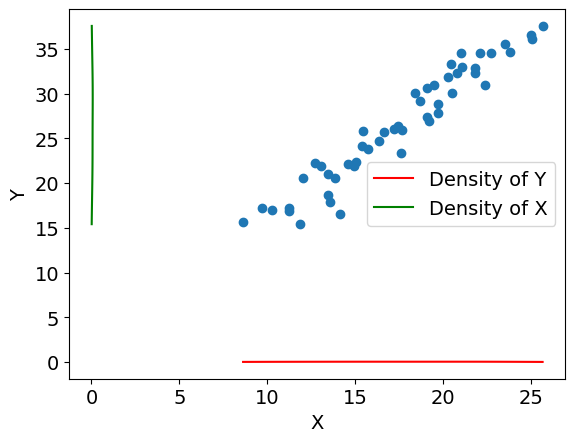

In [103]:
# densitatile de probabilitate
x_density = gaussian_kde(x) #densitatea de probabilitate a variabilei x
y_density = gaussian_kde(y) #densitatea de probabilitate a variabilei y

# grid
x_grid = np.linspace(np.min(x), np.max(x), 100)
y_grid = np.linspace(np.min(y), np.max(y), 100)

# plot
plt.scatter(x, y)
plt.plot(x_grid, y_density(y_grid), label='Density of Y', c='r')
plt.plot(x_density(x_grid), y_grid, label='Density of X', c='g')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

c) determinați coeficientul de corelație dintre cele două seturi;

In [104]:
corr = np.corrcoef(x, y)[0,1]

print("Coeficientul de corelație este:", corr)

Coeficientul de corelație este: 0.9638387722596928


d) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea zero (sau cât mai apropiat de zero); reprezentați într-un scatter plot;


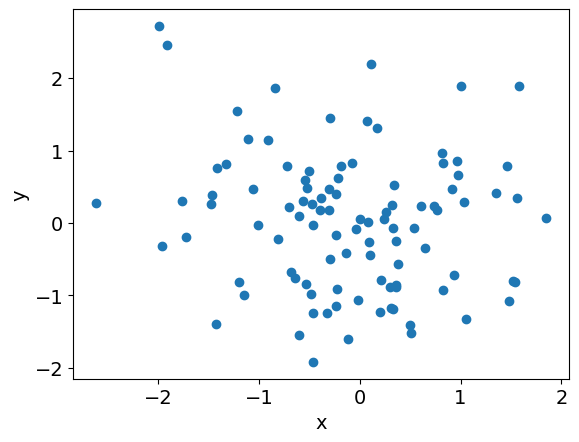

-0.1364222121700025


In [105]:
np.random.seed(42)

x = np.random.normal(loc=0, scale=1, size=100) #generam 100 de valori aleatoare dintr-o distributie normala cu media 0 si deviatia standard 1
y = np.random.normal(loc=0, scale=1, size=100) 
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
corr = np.corrcoef(x, y)[0,1]

# Când se calculează coeficientul de corelație intre x si y, se așteaptă să fie aproape de zero, 
# deoarece nu există nicio relație sistematică între cele două seturi de date; fiecare punct din x este independent de fiecare
# punct din y.

# Un scatter plot al acestor date arată distribuția punctelor și, fără nicio corelație vizibilă,
# punctele ar trebui să fie dispersate aleatoriu în grafic. 

print(corr);

e) 'fabricați' două seturi de date pentru care coeficientul de corelație să vă dea 1, fără ca seturile să fie identice; reprezentați într-un scatter plot;


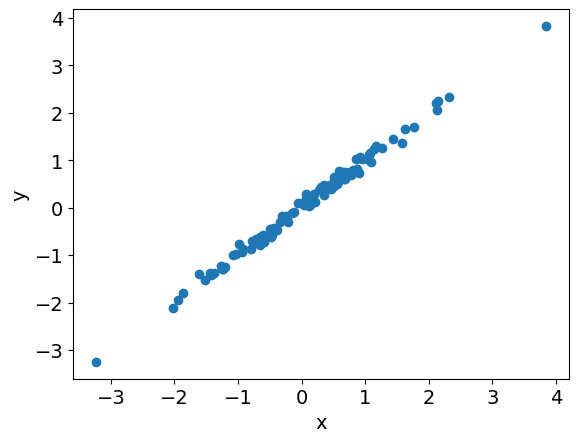

0.9966921314674089


In [106]:
x = np.random.normal(loc=0, scale=1, size=100)
y = x.copy()

#zgomot aleator
y += np.random.normal(loc=0, scale=0.1, size=100) #se adaugă o valoare aleatoare mică, extrasă dintr-o distribuție normală cu media 0 și deviația standard 0.1.
#Setul y este derivat din x prin adăugarea unui zgomot aleator mic, ceea ce introduce o variație, 
#dar păstrează o relație liniară strânsă între cele două seturi de date.

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(np.corrcoef(x, y)[0,1])

f) determinați corelația pentru problema inițială, precum și intercept-ul. Calculați dreapta de regresie prin cele două metode (manual și cu metoda statmodels.OLS), și reprezentați-o

r = 0.9966921314674089
intercept = 0.010685382879556445

Metoda manuala


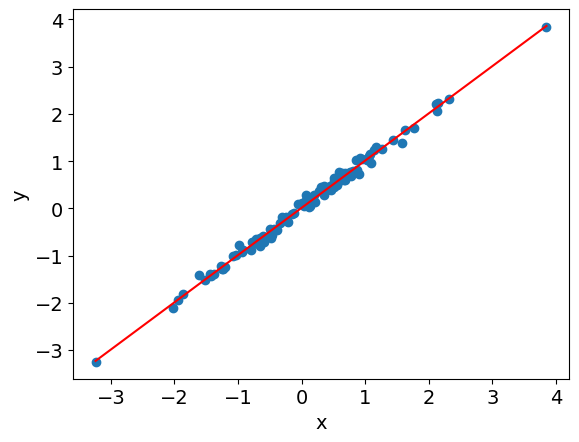

Metoda statmodels.OLS


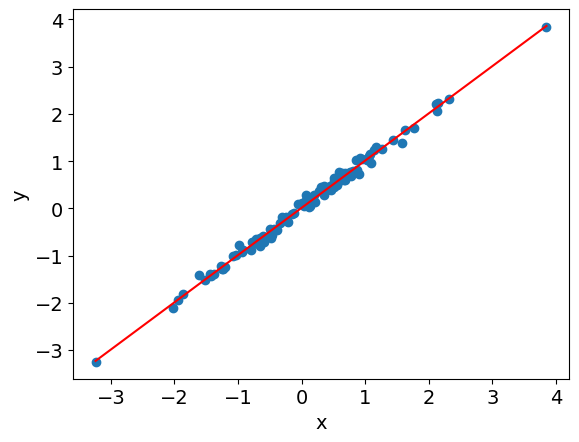

In [107]:
#coeficientul de corelatie - o valoare apropiată de 1 indică o relație liniară puternică între x și y
r = np.corrcoef(x, y)[0, 1]
print("r =",r)

#interceptul si panta liniei de regresie
slope, intercept = np.polyfit(x, y, 1)
print("intercept =",intercept)

print("\nMetoda manuala");

#b1= ∑(xi - x̄)(yi - ȳ) / ∑(xi - x̄)²
#b0= ȳ - β1x̄
b1 = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1) # panta calculată folosind formula de corelație bazată pe covarianță și varianță.
b0 = np.mean(y) - b1 * np.mean(x) #interceptul 


plt.scatter(x, y)
plt.plot([min(x), max(x)], [b0 + b1 * min(x), b0 + b1 * max(x)], 'r') #linia de regresie:
#Linia începe de la minimul valorilor lui x până la maximul valorilor lui x , calculând valorile corespunzătoare lui 
# y folosind formula regresiei liniare ȳ = b0 + b1 × x, unde b0 este interceptul și b1 este panta. Linia este colorată în roșu ('r').
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Metoda statmodels.OLS")


X = sm.add_constant(x) # adaugam o coloana de 1(de obicei) la x pentru a calcula interceptul


model = sm.OLS(y, X).fit() # modelul de regresie liniară
b0, b1 = model.params # Extrage coeficienții modelului ajustat, interceptul și panta


plt.scatter(x, y)
plt.plot([min(x), max(x)], [b0 + b1 * min(x), b0 + b1 * max(x)], 'r') 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Acest exercițiu are scopul de a demonstra cum se poate utiliza regresia liniară pentru a modela relația
# dintre două variabile și pentru a înțelege cum una dintre variabile poate fi folosită pentru a prezice
# sau estima valoarea celeilalte.

Q8. Folosiți setul mtcars.csv. Realizați o regresie liniară cu consumul (miles per gallon) ca variabilă prezisă pe baza puterii motorului (horsepower). Realizați scatter plot-ul și trasați dreapta de regresie. Care este eroarea pătratică medie (RMS) dintre valorile de consum reale și valorile prezise?

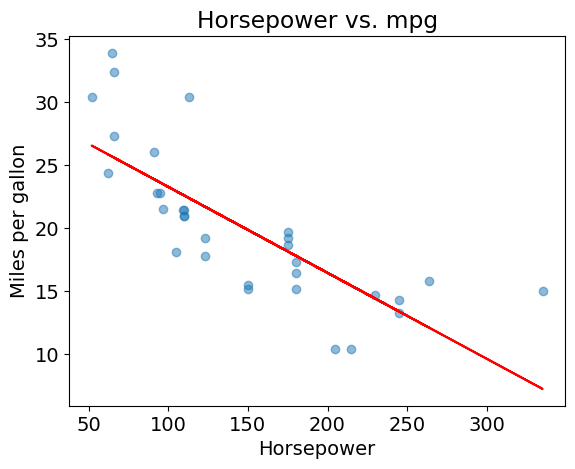

 eroarea pătratică medie (RMS) : 3.7402970868994894


In [108]:
df = pd.read_csv('mtcars.csv')

X = df['hp'].values.reshape(-1,1)  # horsepower, variabila independentă(puterea motorului) 
y = df['mpg'].values.reshape(-1,1) # miles per gallon (mpg), variabila dependentă (consumul de combustibil)

model = LinearRegression() # modelul de regresie liniară; cum variază consumul de combustibil în funcție de puterea motorului
model.fit(X, y) # ajustarea modelului folosind datele extrase.
# Modelul va încerca să stabilească o relație liniară între aceste două variabile, 
# cu scopul de a prezice consumul de combustibil pe baza puterii motorului. 
# Acest lucru implică găsirea unei linii drepte (panta și interceptul) care să descrie cel mai bine 
# cum variază mpg când hp se schimbă.

y_pred = model.predict(X) # prezicerea valorilor mpg folosind modelul ajustat

plt.scatter(X, y, alpha=0.5) 
plt.plot(X, y_pred, color='red')
plt.title('Horsepower vs. mpg')
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.show()


mse = mean_squared_error(y, y_pred) #se calculeaza eroarea pătratică medie (MSE) între valorile reale și cele prezise.

#Calculul RMS oferă o evaluare numerică a performanței modelului, indicând cât de
# apropiate sunt predicțiile de valorile reale.
print(' eroarea pătratică medie (RMS) :', np.sqrt(mse)) #rădăcina pătrată a MSE, cunoscută sub numele de RMS (Root Mean Square Error), care este o măsură a calității ajustării modelului.